

## Task **3** : Iris Flower Classification

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

The data has 150 rows and 6 columns.

Dataset Information:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Statistical Summary :

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for Null values

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No Null values in dataset.

In [9]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

There are 3 species of iris flower.Each having 50 observations.

EDA

Plot histograms of each feature :

<Axes: >

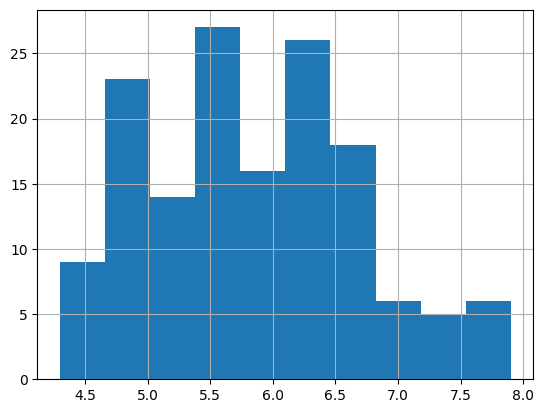

In [10]:
df['sepal_length'].hist()

<Axes: >

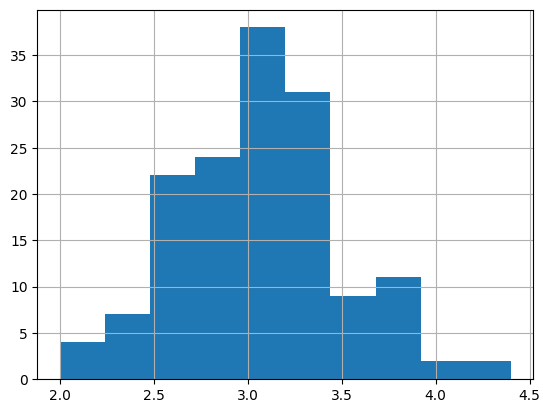

In [11]:
df['sepal_width'].hist()

<Axes: >

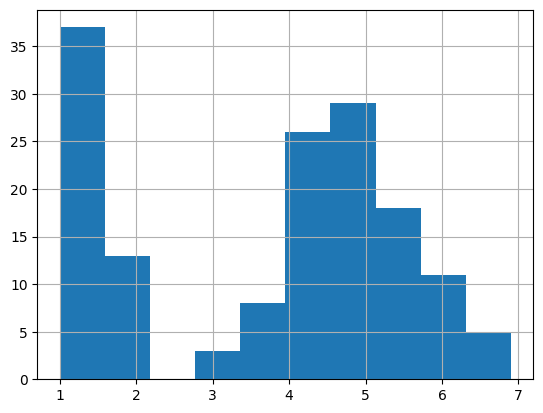

In [12]:
df['petal_length'].hist()

<Axes: >

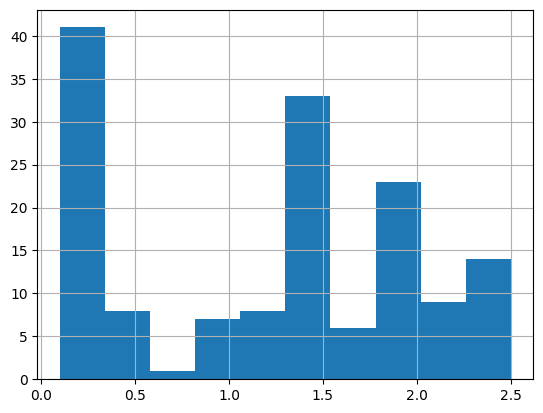

In [13]:
df['petal_width'].hist()

Barplot showing the species petal width :

Text(0, 0.5, 'PetalWidth')

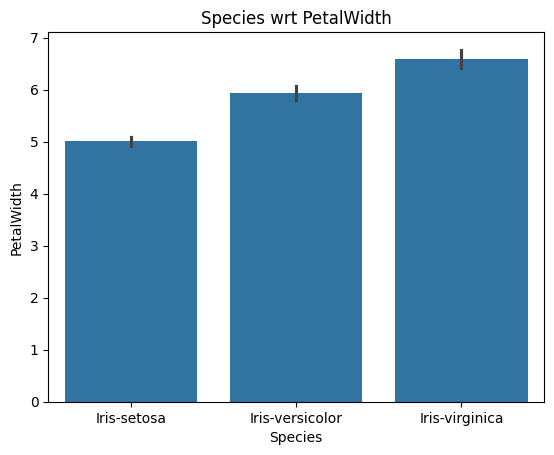

In [14]:
sns.barplot(x=df['species'],y=df['sepal_length'] )
plt.title("Species wrt PetalWidth")
plt.xlabel("Species")
plt.ylabel("PetalWidth")

Iris Virginica has maximum petal width among the three.

Scatter plot between sepal_length, petal_length


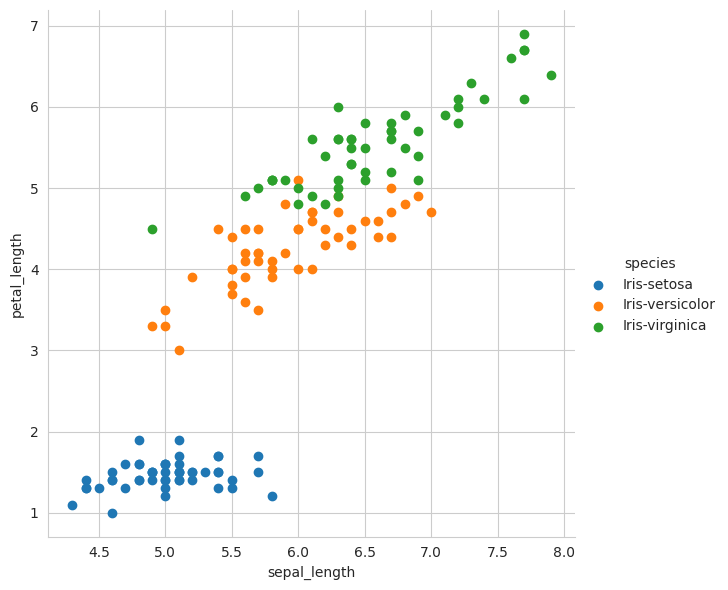

In [16]:
sns.set_style("whitegrid")

sns.FacetGrid(df, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()

Correlation Heatmap :

<Axes: >

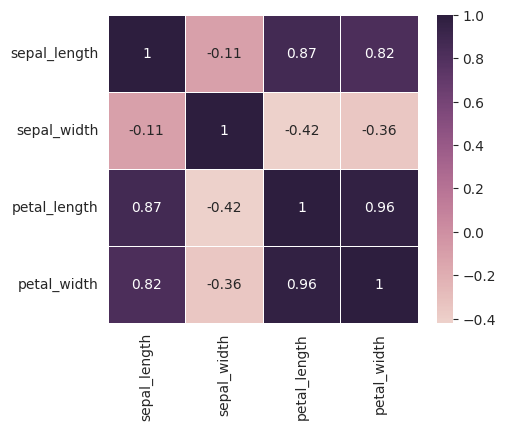

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

Splilting data into Training and Testing Data

In [21]:
X= df[['sepal_length','sepal_width','petal_length','petal_width']]
y= df['species']

In [22]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

Training the Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
print("Accuracy (Logistic Regression): ", model1.score(x_test, y_test) * 100)

Accuracy (Logistic Regression):  95.0


Confusion Matrix for logistic Regression :

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred1 = model1.predict(x_test)

In [29]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)

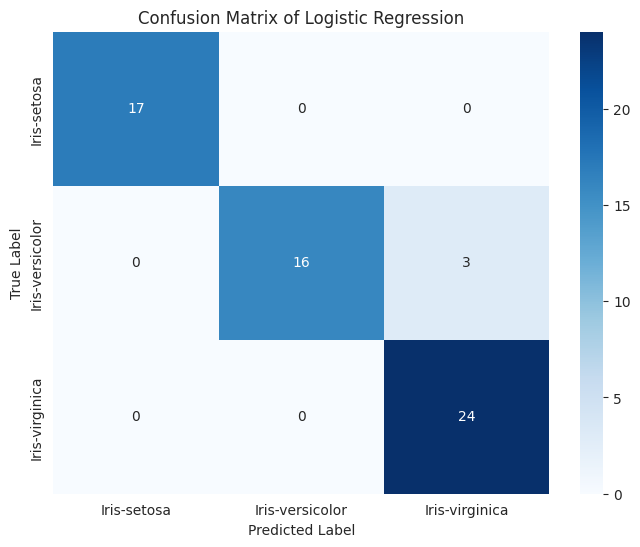

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()